In [1]:
import os
from glob import glob
import torch
from nips2018.utils.load_pretrained_model import load_model
from nips2018.movie.parameters import DataConfig
from nips2018.utils.evaluation import test_correlations, oracle_correlations, fraction_oracle, mean_eye_beh

Connecting nikoskar@at-database1.ad.bcm.edu:3306


In [2]:
save_path = './saved_models/'
model_list = glob(save_path + "*.pt")
for i, path in enumerate(model_list):
    print(i, '--', os.path.basename(path))

0 -- gid21_20457_2_20_v1.pt
1 -- gid20_20457_1_15_v2.pt
2 -- gid21_20457_2_20_v5.pt
3 -- gid21_20457_2_20_v3.pt
4 -- 17797_8_5_drf_v2.pt
5 -- 17797_8_5_v3.pt
6 -- gid20_20457_1_15_v3.pt
7 -- 17797_8_5_drf_v1.pt
8 -- gid20_20457_1_15_v1.pt
9 -- old_core_young_readout.pt
10 -- 17797_8_5_v2.pt
11 -- gid21_20457_2_20_v2.pt
12 -- 17797_8_5_drf_v3.pt
13 -- young_core_old_readout.pt
14 -- gid21_20457_2_20_v4.pt
15 -- 17797_8_5_v1.pt


In [3]:
file = model_list[5]
model = load_model(groupid=67, filename=file).cuda().eval()

---------------------------+--------------------------------------------------------------------------------
AreaLayerClip              | Loading stimulus.Clip dataset with tier= test
---------------------------+--------------------------------------------------------------------------------
MovieMultiDataset          | Fetching data for
                           |  {         'brain_area': 'V1',
                           |           'data_hash': '29793eec715efd8898f2cba46dd6982a',
                           |           'group_id': 67,
                           |           'layer': 'L2/3',
                           |           'seed': 1009,
                           |           'stats_source': 'stimulus.Clip',
                           |           'train_seq_len': 150}
MovieMultiDataset          | Data will be (inputs,behavior,eye_position,responses)
MovieMultiDataset          | Loading dataset group067-17797-8-5-pre0-seg6-spi5-pip1 -->
                           |      /mnt/scrat

In [4]:
# load the test data
# key = dict(data_hash='5253599d3dceed531841271d6eeba9c5', group_id=21)
key = dict(data_hash='29793eec715efd8898f2cba46dd6982a', group_id=67)
testsets, testloaders = DataConfig().load_data(key, tier='test', batch_size=1)

---------------------------+--------------------------------------------------------------------------------
AreaLayerClip              | Loading stimulus.Clip dataset with tier= test
---------------------------+--------------------------------------------------------------------------------
MovieMultiDataset          | Fetching data for
                           |  {         'brain_area': 'V1',
                           |           'data_hash': '29793eec715efd8898f2cba46dd6982a',
                           |           'group_id': 67,
                           |           'layer': 'L2/3',
                           |           'stats_source': 'stimulus.Clip',
                           |           'train_seq_len': 150}
MovieMultiDataset          | Data will be (inputs,behavior,eye_position,responses)
MovieMultiDataset          | Loading dataset group067-17797-8-5-pre0-seg6-spi5-pip1 -->
                           |      /mnt/scratch07/cache/movies17797-8-5-pre0-pipe1-seg6-spike5.h5


In [5]:
# get the oracle scores
oracle_pearsons = oracle_correlations(key)
print('------------------')
print('Oracle score is {}'.format(oracle_pearsons.mean()))

AreaLayerClip              | Loading stimulus.Clip dataset with tier= test
---------------------------+--------------------------------------------------------------------------------
MovieMultiDataset          | Fetching data for
                           |  {         'brain_area': 'V1',
                           |           'data_hash': '29793eec715efd8898f2cba46dd6982a',
                           |           'group_id': 67,
                           |           'layer': 'L2/3',
                           |           'stats_source': 'stimulus.Clip',
                           |           'train_seq_len': 150}
MovieMultiDataset          | Data will be (inputs,behavior,eye_position,responses)
MovieMultiDataset          | Loading dataset group067-17797-8-5-pre0-seg6-spi5-pip1 -->
                           |      /mnt/scratch07/cache/movies17797-8-5-pre0-pipe1-seg6-spike5.h5
---------------------------+--------------------------------------------------------------------------------


In [6]:
mean_eye, mean_beh = mean_eye_beh(testloaders)

/home/nikoskar/environments/nbase/lib/python3.6/site-packages/torch/tensor.py:330: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


/home/nikoskar/environments/nbase/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/nikoskar/environments/nbase/lib/python3.6/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/home/nikoskar/environments/nbase/lib/python3.6/site-packages/nips2018-0.0.0-py3.6.egg/nips2018/utils/evaluation.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fraction, _, _, _ = np.lina

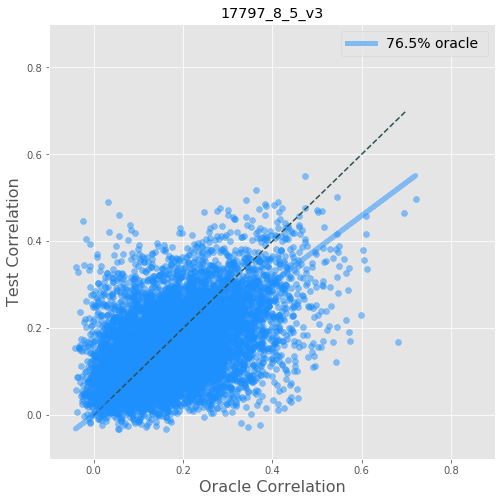

In [7]:
# test scores and fraction oracles
test_pearsons = test_correlations(
    testsets, 
    testloaders, 
    model, 
    constant_eye=None, 
    constant_beh=None)

fraction_oracle(
    oracle_pearsons, 
    test_pearsons, 
    savepath='./figs/17797_8_5_v3.png',
    title='17797_8_5_v3')